In [72]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import hvplot.pandas 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [73]:
# Load the data from CSV file
data = pd.read_csv('parsed_spotify_data.csv')
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [74]:
# Preprocess the data
X = data.select_dtypes(include=['number'])  # Select only numerical columns

# Choose the number of clusters (you may need to tune this parameter)
num_clusters = 8

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, 6, 7, 7, 7, 0, 0, 7, 7, 0, 2, 7, 5, 6, 7, 0, 7, 0, 0, 0,
       2, 0, 7, 0, 6, 0, 7, 7, 0, 0, 3, 6, 3, 0, 0, 6, 6, 0, 0, 5, 2, 2,
       0, 7, 6, 7, 1, 7, 0, 3, 0, 7, 5, 4, 7, 3, 0, 6, 0, 3, 7, 3, 3, 1,
       7, 7, 0, 0, 0, 5, 3, 2, 6, 1, 7, 6, 7, 0, 1, 7, 0, 0, 2, 7, 2, 6,
       3, 0, 0, 0, 7, 3, 0, 7, 7, 7, 5, 0, 6, 7, 7, 2, 0, 0, 5, 7, 3, 2,
       1, 0, 0, 0, 4, 5, 7, 0, 0, 6, 0, 3, 7, 0, 0, 7, 3, 5, 2, 0, 0, 7,
       6, 3, 2, 0, 0, 0, 2, 7, 5, 0, 0, 5, 0, 0, 3, 5, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 1, 3, 7, 0, 3, 4, 3, 2, 2, 5, 5, 1, 7, 3, 0, 1, 1, 0, 3,
       5, 5, 7, 1, 6, 0, 1, 0, 2, 0, 5, 5, 5, 5, 0, 7, 6, 0, 7, 2, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 7, 0, 7,
       0, 7, 0, 0, 3, 0, 0, 7, 0, 0, 6, 6, 0, 0, 0, 7, 0, 7, 0, 3, 0, 0,
       3, 6, 3, 3, 6, 0, 0, 0, 5, 0, 7, 3, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 0, 0, 0, 6, 7, 0, 0, 7, 3, 0, 0,
       0, 0, 3, 0, 0, 7, 6, 0, 0, 7, 1, 6, 0, 0, 0,

In [75]:
# Add the cluster labels to the original dataset
data['cluster'] = cluster_labels

# Display the count of records in each cluster
print("\nCount of records in each cluster:")
print(data['cluster'].value_counts())




Count of records in each cluster:
cluster
0    413
7    226
3    118
6     77
2     50
5     34
1     24
4     11
Name: count, dtype: int64


In [76]:


# Select the numerical columns for plotting
numeric_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Visualize using hvplot.scatter
scatter_plot = data.hvplot.scatter(x='bpm', y='danceability_%', by='key', c='cluster', cmap='Category10', legend='top_right', hover_cols=['track_name'])
scatter_plot


:NdOverlay   [key]
   :Scatter   [bpm]   (danceability_%,cluster,track_name)

In [77]:


# Select the numerical columns for plotting
numeric_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Visualize using hvplot.scatter
scatter_plot = data.hvplot.scatter(x='bpm', y='valence_%', by='key', c='cluster', cmap='Category10', legend='top_right', hover_cols=['track_name'])
scatter_plot

:NdOverlay   [key]
   :Scatter   [bpm]   (valence_%,cluster,track_name)

In [78]:
# Add the cluster labels to the original dataset
data['cluster'] = cluster_labels

# Display the count of records in each cluster
print("\nCount of records in each cluster:")
print(data['cluster'].value_counts())




Count of records in each cluster:
cluster
0    413
7    226
3    118
6     77
2     50
5     34
1     24
4     11
Name: count, dtype: int64


In [79]:

# Select the numerical columns for plotting
numeric_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Visualize using hvplot.scatter
scatter_plot = data.hvplot.scatter(x='bpm', y='danceability_%', by='key', c='cluster', cmap='Category10', legend='top_right', hover_cols=['track_name'])
scatter_plot

:NdOverlay   [key]
   :Scatter   [bpm]   (danceability_%,cluster,track_name)

In [80]:


# Select the numerical columns for plotting
numeric_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Visualize using hvplot.scatter
scatter_plot = data.hvplot.scatter(x='bpm', y='energy_%', by='key', c='cluster', cmap='Category10', legend='top_right', hover_cols=['track_name'])
scatter_plot

:NdOverlay   [key]
   :Scatter   [bpm]   (energy_%,cluster,track_name)

In [81]:

# Select the numerical columns for plotting
numeric_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Visualize using hvplot.scatter
scatter_plot = data.hvplot.scatter(x='mode', y='energy_%', by='key', c='cluster', cmap='Category10', legend='top_right', hover_cols=['track_name'])
scatter_plot

:NdOverlay   [key]
   :Scatter   [mode]   (energy_%,cluster,track_name)

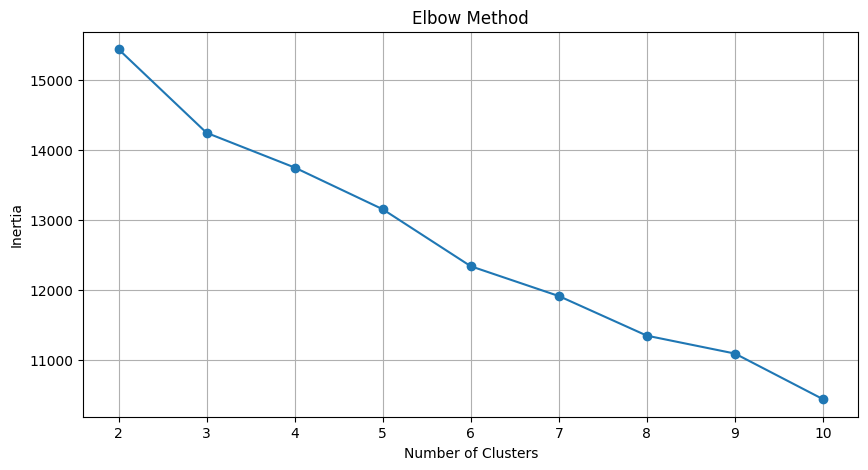

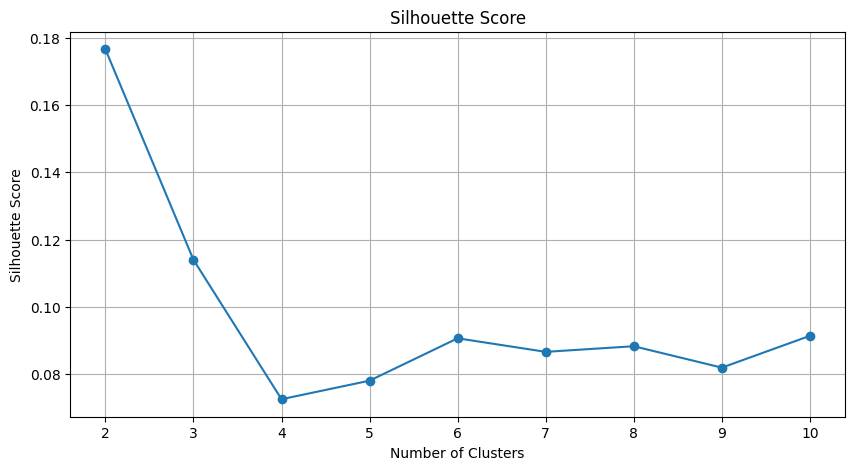

In [82]:

# Selecting relevant features for clustering
X = data.select_dtypes(include=['number'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Define range of number of clusters to try
range_n_clusters = range(2, 11)

# Iterate over different numbers of clusters
for n_clusters in range_n_clusters:
    # Create KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(X_scaled)
    
    # Append inertia and silhouette score to lists
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Plotting the Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


In [83]:

# Selecting relevant features for clustering
X = data.select_dtypes(include=['number'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
num_clusters = 3

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_

# Convert "streams" column to numeric
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Log-transform the "streams" feature
data['log_streams'] = np.log1p(data['streams'])

# Visualize the clusters using hvplot.scatter with log-transformed streams
scatter_plot = data.hvplot.scatter(x='released_year', y='log_streams', c='cluster', colormap='viridis', hover_cols=['track_name'])
scatter_plot


:Scatter   [released_year]   (log_streams,cluster,track_name)